# Setup

Inspired by the code in this [tutorial](https://medium.com/towards-formula-1-analysis/formula-1-data-analysis-tutorial-2021-russian-gp-to-box-or-not-to-box-da6399bd4a39)

The goal of this notebook is to analyse the speed of each drivers. The analysis focuses on the race track that is divided in mini-sectors to check which part(s) of the track, drivers are the quickest/slowest.

In [1]:
import fastf1 as ff1 
from fastf1 import plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('../cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

# Race

In [45]:
!pip install --upgrade fasft1

ERROR: Could not find a version that satisfies the requirement fasft1 (from versions: none)
ERROR: No matching distribution found for fasft1


In [3]:
#let's see Spain
race = ff1.get_session(2021,'Spain', 'R')

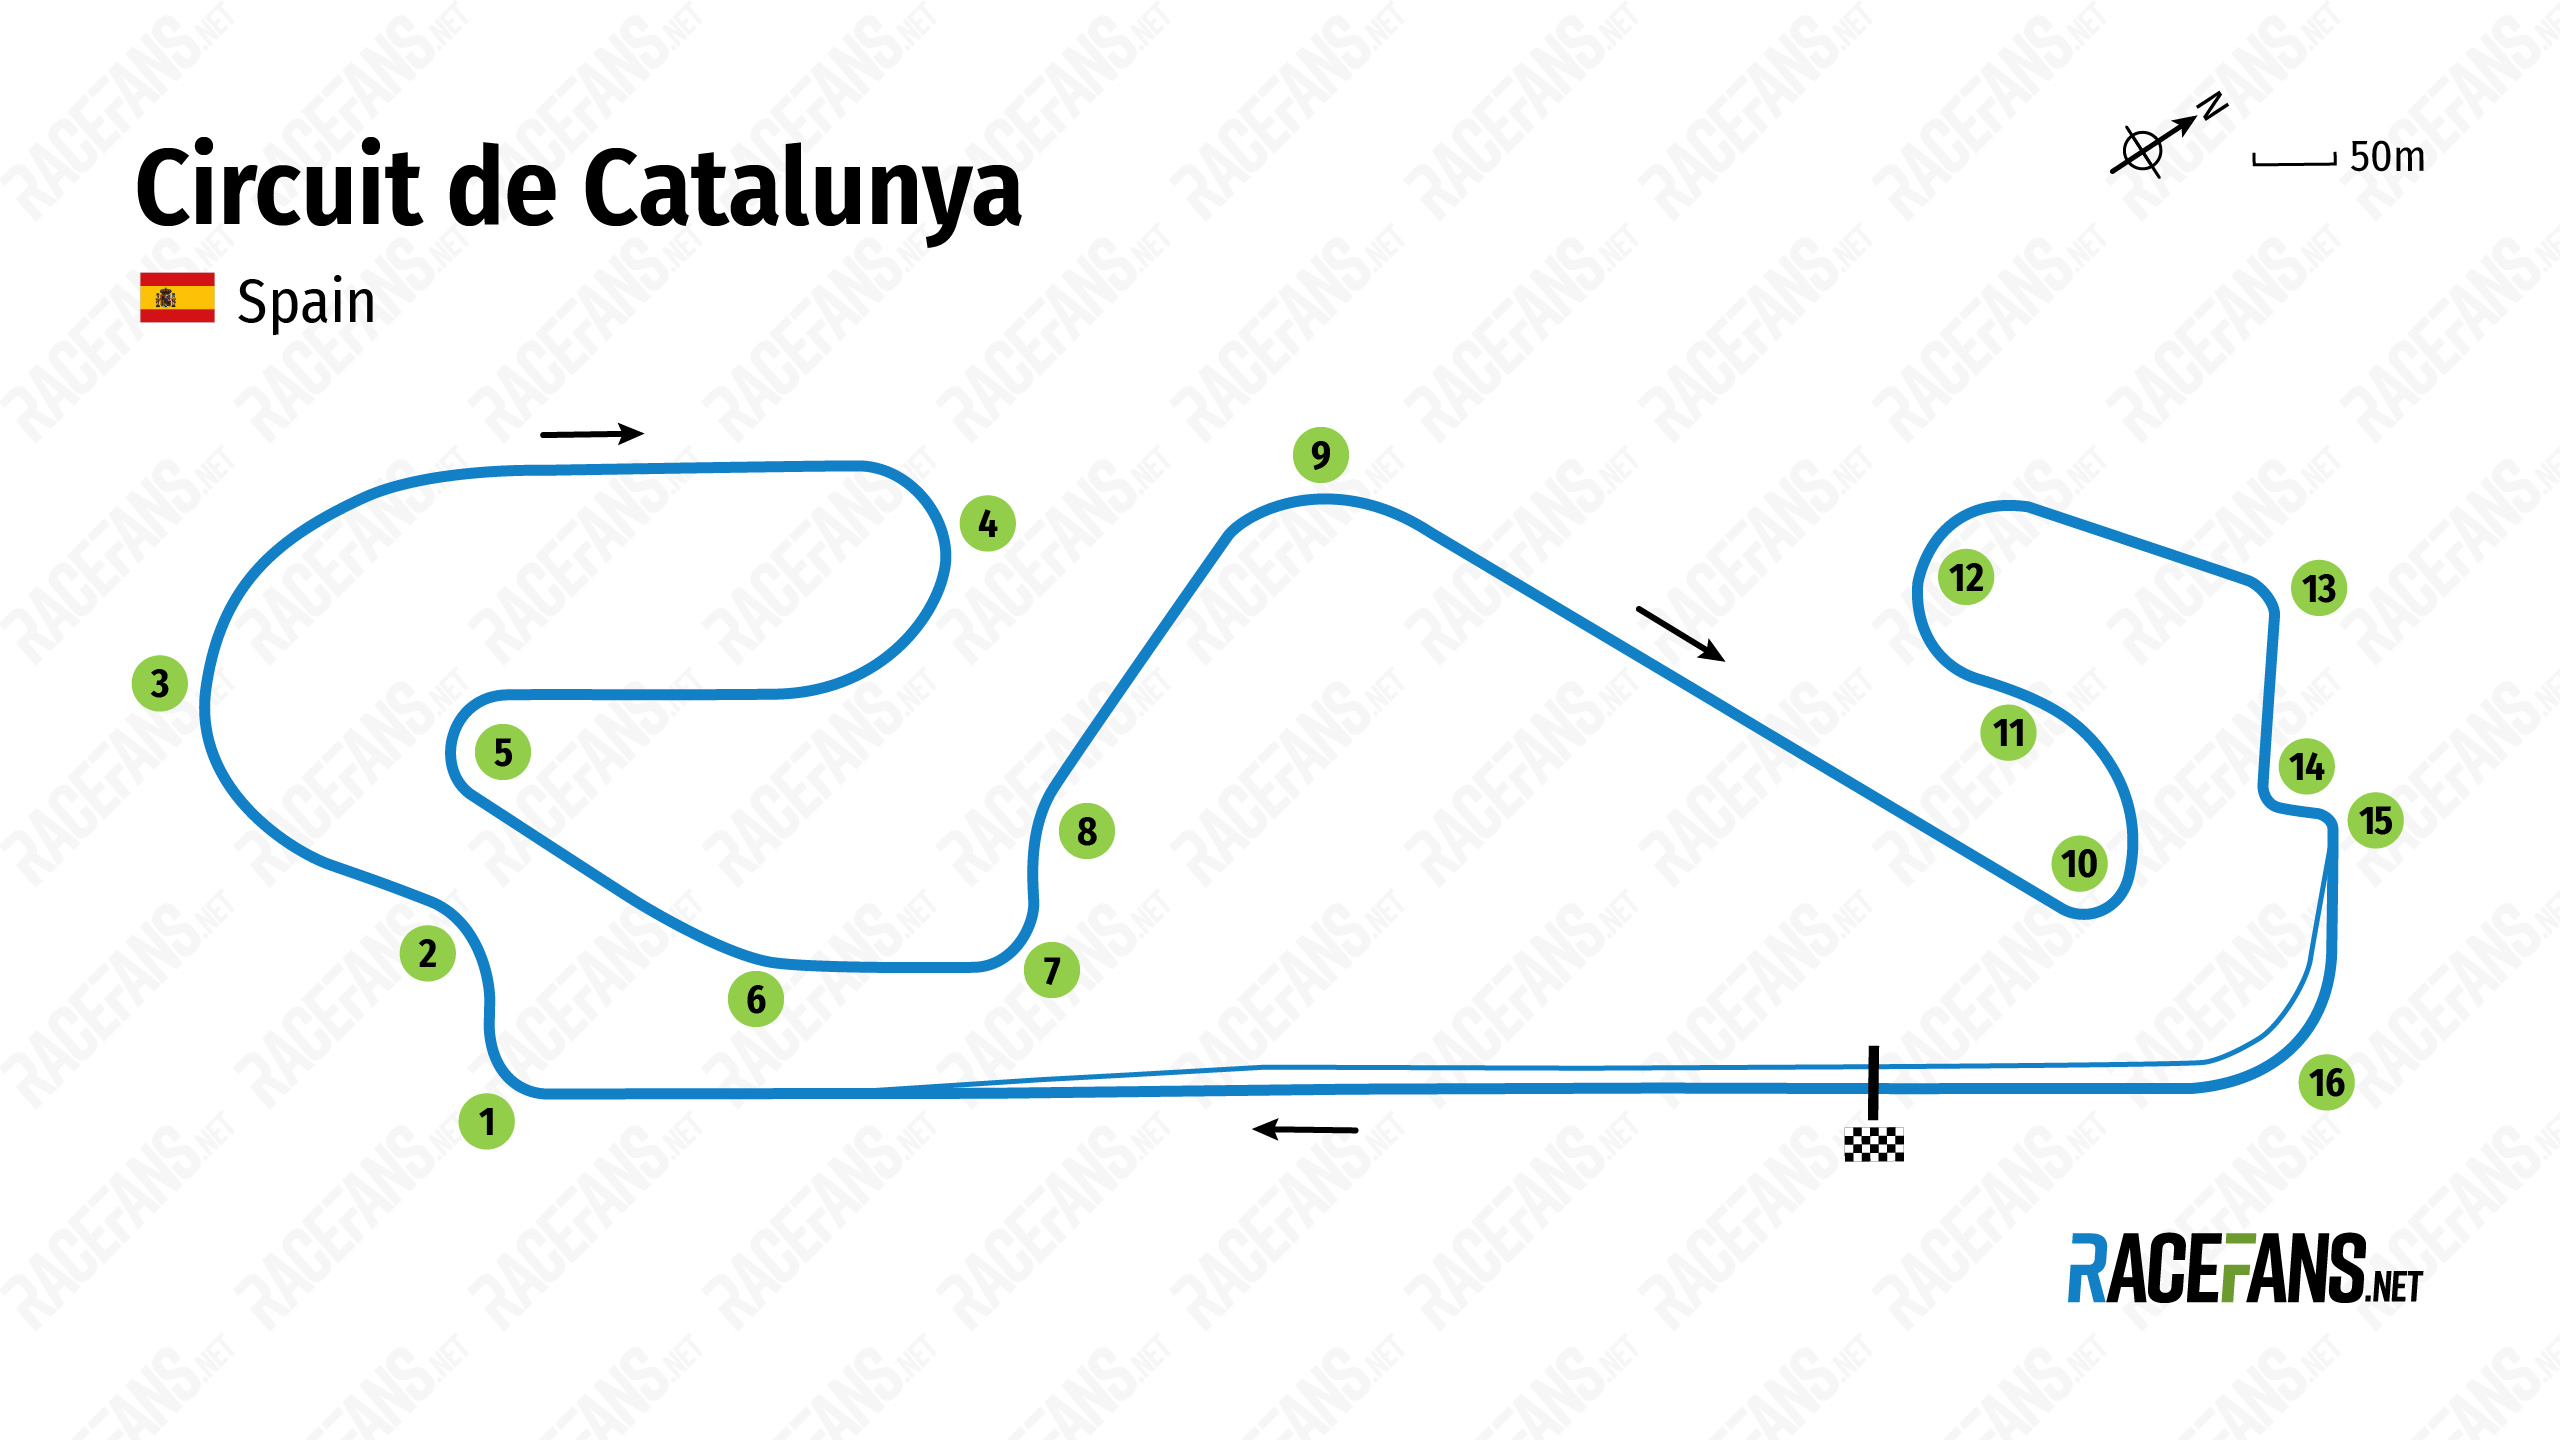

In [4]:
laps = race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Spanish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['3', '55', '6', '4', '18', '33', '31', '16', '44', '11', '5', '47', '7', '99', '14', '10', '63', '9', '77', '22']


In [5]:
# Calculate RaceLapNumber (LapNumber minus 1 since the warmup lap is included in LapNumber)
laps['RaceLapNumber'] = laps['LapNumber'] - 1

# Starting from lap 45 it started raining
laps = laps.loc[laps['RaceLapNumber'] >= 45]

In [6]:
laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,RaceLapNumber
45,0 days 01:39:17.778000,44,0 days 00:01:20.730000,46,3,NaT,NaT,0 days 00:00:22.925000,0 days 00:00:30.377000,0 days 00:00:27.428000,...,MEDIUM,10.0,False,0 days 01:37:57.048000,Mercedes,HAM,1,True,2021-05-09 14:07:57.056,45
46,0 days 01:40:39.126000,44,0 days 00:01:21.348000,47,3,NaT,NaT,0 days 00:00:22.857000,0 days 00:00:30.610000,0 days 00:00:27.881000,...,MEDIUM,11.0,False,0 days 01:39:17.778000,Mercedes,HAM,1,True,2021-05-09 14:09:17.786,46
47,0 days 01:42:00.396000,44,0 days 00:01:21.270000,48,3,NaT,NaT,0 days 00:00:22.556000,0 days 00:00:30.746000,0 days 00:00:27.968000,...,MEDIUM,12.0,False,0 days 01:40:39.126000,Mercedes,HAM,1,True,2021-05-09 14:10:39.134,47
48,0 days 01:43:21.551000,44,0 days 00:01:21.155000,49,3,NaT,NaT,0 days 00:00:22.978000,0 days 00:00:30.448000,0 days 00:00:27.729000,...,MEDIUM,13.0,False,0 days 01:42:00.396000,Mercedes,HAM,1,True,2021-05-09 14:12:00.404,48
49,0 days 01:44:42.545000,44,0 days 00:01:20.994000,50,3,NaT,NaT,0 days 00:00:22.924000,0 days 00:00:30.614000,0 days 00:00:27.456000,...,MEDIUM,14.0,False,0 days 01:43:21.551000,Mercedes,HAM,1,True,2021-05-09 14:13:21.559,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0 days 02:01:32.879000,9,0 days 00:01:27.116000,60,3,NaT,NaT,0 days 00:00:23.815000,0 days 00:00:32.468000,0 days 00:00:30.833000,...,MEDIUM,18.0,True,0 days 02:00:05.763000,Haas F1 Team,MAZ,1,True,2021-05-09 14:30:05.771,59
1242,0 days 02:03:02.926000,9,0 days 00:01:30.047000,61,3,NaT,NaT,0 days 00:00:24.428000,0 days 00:00:33.151000,0 days 00:00:32.468000,...,MEDIUM,19.0,True,0 days 02:01:32.879000,Haas F1 Team,MAZ,1,True,2021-05-09 14:31:32.887,60
1243,0 days 02:04:30.325000,9,0 days 00:01:27.399000,62,3,NaT,NaT,0 days 00:00:24.252000,0 days 00:00:33.727000,0 days 00:00:29.420000,...,MEDIUM,20.0,True,0 days 02:03:02.926000,Haas F1 Team,MAZ,1,True,2021-05-09 14:33:02.934,61
1244,0 days 02:05:55.064000,9,0 days 00:01:24.739000,63,3,NaT,NaT,0 days 00:00:23.814000,0 days 00:00:32.169000,0 days 00:00:28.756000,...,MEDIUM,21.0,True,0 days 02:04:30.325000,Haas F1 Team,MAZ,1,True,2021-05-09 14:34:30.333,62


# Telemetry Data of Every Driver

In [7]:
drivers = pd.unique(laps['Driver'])

telemetry = pd.DataFrame()

#telemetry is only retrieved driver-by-driver

for driver in drivers:
    driver_laps = laps.pick_driver(driver) # pick_driver focuses on specific drivers' telemetry 
    
    for lap in driver_laps.iterlaps(): # equivalent to pandas iterrows()
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RaceLapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
        
        telemetry = telemetry.append(driver_telemetry)

In [8]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap,Compound
2,2021-05-09 14:07:57.056,0 days 01:37:57.048000,,736.884167,0 days 00:00:00,11458,280,7,100,0,...,interpolation,0.000004,OnTrack,884,-372,1707,0.000000,HAM,45,MEDIUM
3,2021-05-09 14:07:57.223,0 days 01:37:57.215000,,736.884167,0 days 00:00:00.167000,11476,281,7,100,0,...,pos,0.002799,OnTrack,816,-484,1707,13.035278,HAM,45,MEDIUM
4,2021-05-09 14:07:57.305,0 days 01:37:57.297000,,736.884167,0 days 00:00:00.249000,11513,283,7,100,0,...,car,0.004177,OnTrack,781,-538,1706,19.481389,HAM,45,MEDIUM
5,2021-05-09 14:07:57.443,0 days 01:37:57.435000,,736.884167,0 days 00:00:00.387000,11513,284,7,100,0,...,pos,0.006503,OnTrack,722,-630,1707,30.368056,HAM,45,MEDIUM
6,2021-05-09 14:07:57.506,0 days 01:37:57.498000,77,736.884167,0 days 00:00:00.450000,11513,285,7,100,0,...,car,0.007568,OnTrack,695,-671,1707,35.355556,HAM,45,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2021-05-09 14:37:19.184,0 days 02:07:19.176000,55,3697.473056,0 days 00:01:24.112000,11321,279,7,100,0,...,pos,0.991727,OnTrack,1013,-176,1707,4625.416667,MAZ,63,MEDIUM
736,2021-05-09 14:37:19.191,0 days 02:07:19.183000,55,3695.806389,0 days 00:01:24.119000,11353,280,7,100,0,...,car,0.991845,OnTrack,1010,-180,1707,4625.961111,MAZ,63,MEDIUM
737,2021-05-09 14:37:19.404,0 days 02:07:19.396000,55,3692.573056,0 days 00:01:24.332000,11408,282,7,100,0,...,pos,0.995442,OnTrack,931,-304,1708,4642.646111,MAZ,63,MEDIUM
738,2021-05-09 14:37:19.431,0 days 02:07:19.423000,55,3689.339722,0 days 00:01:24.359000,11464,284,7,100,0,...,car,0.995901,OnTrack,920,-320,1708,4644.776111,MAZ,63,MEDIUM


In [9]:
# let's keep the relevant columns i.e Lap, Distance, Compound, Speed, X, Y

In [10]:
# let's keep the relevant columns i.e Lap, Distance, Compound, Speed, X, Y

telemetry = telemetry[['Lap', 'Distance', 'Compound', 'Speed', 'X', 'Y']]

# the tyres other than intermediates will be called 'SLICK'

telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'

In [11]:
telemetry

,Lap,Distance,Compound,Speed,X,Y
2,45,0.000000,SLICK,280,884,-372
3,45,13.035278,SLICK,281,816,-484
4,45,19.481389,SLICK,283,781,-538
5,45,30.368056,SLICK,284,722,-630
6,45,35.355556,SLICK,285,695,-671
...,...,...,...,...,...,...
735,63,4625.416667,SLICK,279,1013,-176
736,63,4625.961111,SLICK,280,1010,-180
737,63,4642.646111,SLICK,282,931,-304
738,63,4644.776111,SLICK,284,920,-320


# Mini-Sectors

In [12]:
# 25 mini sectors
n_mini_sectors = 25

# total distance

tot_distance = max(telemetry['Distance'])

mini_sector_length = tot_distance / n_mini_sectors

minisectors = [0]

for i in range(0, n_mini_sectors-1):
    minisectors.append(mini_sector_length * (i+1))

In [14]:
# Assign minisector to every row in the telemetry data
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index( # based on the distance, we can link the distance to its relevant sector
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

In [16]:
average_speed = telemetry.groupby(['Lap', 'Minisector', 'Compound'])['Speed'].mean().reset_index()
average_speed

,Lap,Minisector,Compound,Speed
0,45,1,SLICK,288.920188
1,45,2,SLICK,300.008000
2,45,3,SLICK,307.398352
3,45,4,SLICK,310.630556
4,45,5,SLICK,220.165692
...,...,...,...,...
520,65,21,SLICK,145.604240
521,65,22,SLICK,175.552743
522,65,23,SLICK,113.750000
523,65,24,SLICK,190.511737


In [18]:
average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()

Lap  Minisector
45   1               0
     2               1
     3               2
     4               3
     5               4
                  ... 
65   21            520
     22            521
     23            522
     24            523
     25            524
Name: Speed, Length: 525, dtype: int64

In [20]:
fastest_compounds_on_sectors = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]

In [17]:
# Select the compound with the highest average speed
fastest_compounds = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Lap', 'Minisector', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

In [33]:
telemetry = telemetry.merge(fastest_compounds, on=['Lap', 'Minisector']) 
telemetry = telemetry.sort_values('Distance') # sort values so matplotlib works

In [36]:
telemetry.drop(['Fastest_compound_x', 'Fastest_compound_y'],inplace=True, axis = 1)

In [37]:
telemetry

,Lap,Distance,Compound,Speed,X,Y,Minisector,Fastest_compound
0,45,0.000000,SLICK,280,884,-372,1,SLICK
3110,47,0.000000,SLICK,280,871,-396,1,SLICK
3109,47,0.000000,SLICK,286,891,-365,1,SLICK
1193,57,0.000000,SLICK,283,886,-372,1,SLICK
2863,50,0.000000,SLICK,284,887,-370,1,SLICK
...,...,...,...,...,...,...,...,...
279018,49,4687.270833,SLICK,283,906,-343,25,SLICK
279019,49,4690.808333,SLICK,283,886,-373,25,SLICK
273031,50,4694.401389,SLICK,284,866,-402,25,SLICK
279020,49,4699.752500,SLICK,284,889,-367,25,SLICK


In [38]:
telemetry.loc[telemetry['Fastest_compound'] == "INTERMEDIATE", 'Fastest_compound_int'] = 1
telemetry.loc[telemetry['Fastest_compound'] == 'SLICK', 'Fastest_compound_int'] = 2

In [39]:
telemetry

,Lap,Distance,Compound,Speed,X,Y,Minisector,Fastest_compound,Fastest_compound_int
0,45,0.000000,SLICK,280,884,-372,1,SLICK,2.0
3110,47,0.000000,SLICK,280,871,-396,1,SLICK,2.0
3109,47,0.000000,SLICK,286,891,-365,1,SLICK,2.0
1193,57,0.000000,SLICK,283,886,-372,1,SLICK,2.0
2863,50,0.000000,SLICK,284,887,-370,1,SLICK,2.0
...,...,...,...,...,...,...,...,...,...
279018,49,4687.270833,SLICK,283,906,-343,25,SLICK,2.0
279019,49,4690.808333,SLICK,283,886,-373,25,SLICK,2.0
273031,50,4694.401389,SLICK,284,866,-402,25,SLICK,2.0
279020,49,4699.752500,SLICK,284,889,-367,25,SLICK,2.0


In [ ]:
def sector_plot(lap, save=False, details=True):
    
    single_lap = telemetry.loc[telemetry['Lap'] == lap] 
    
    x = np.array(single_lap['X'].values)
    y = np.array(single_lap['Y'].values)
    
    
    